In [14]:
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import math

In [15]:
data = pd.read_csv('fix_air_bnb.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,0.801163,-0.061002,0,-0.031428,4,2.719214,2018-10-28,1.960308,4,0.510095
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,1.254363,-0.026598,1,-0.236287,2,-0.323022,2018-10-01,0.277072,1,-0.670491
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,0.816044,0.197933,0,0.111498,62,3.398285,2017-03-20,0.154786,1,1.171559
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,-0.355954,-0.983069,1,-0.193410,5,0.193072,2018-08-16,-0.463839,1,1.816276
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,1.080693,0.155054,1,-0.117183,2,4.865077,2018-11-04,0.514452,1,-0.452794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,0.779358,-0.092483,0,-0.031428,2,-0.485999,2018-11-07,-0.355939,1,1.958617
22463,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,-0.441695,-1.109359,2,-0.221995,1,-0.485999,2018-11-07,-0.355939,6,-0.017401
22464,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,0.712389,0.101763,0,0.087677,3,-0.485999,2018-11-07,-0.355939,2,-0.544897
22465,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,0.355745,-0.472443,1,0.154375,1,-0.485999,2018-11-07,-0.355939,3,-0.620253


In [16]:
data_fix1 = data[(['id','host_id','latitude','longitude','room_type','price','minimum_nights'])]
data_fix1

,id,host_id,latitude,longitude,room_type,price,minimum_nights
0,2015,2217,0.801163,-0.061002,0,-0.031428,4
1,2695,2986,1.254363,-0.026598,1,-0.236287,2
2,3176,3718,0.816044,0.197933,0,0.111498,62
3,3309,4108,-0.355954,-0.983069,1,-0.193410,5
4,7071,17391,1.080693,0.155054,1,-0.117183,2
...,...,...,...,...,...,...,...
22462,29856708,87555909,0.779358,-0.092483,0,-0.031428,2
22463,29857108,67537363,-0.441695,-1.109359,2,-0.221995,1
22464,29864272,3146923,0.712389,0.101763,0,0.087677,3
22465,29866805,36961901,0.355745,-0.472443,1,0.154375,1


In [17]:
data_fix2 = data_fix1.dropna()
data_fix2

,id,host_id,latitude,longitude,room_type,price,minimum_nights
0,2015,2217,0.801163,-0.061002,0,-0.031428,4
1,2695,2986,1.254363,-0.026598,1,-0.236287,2
2,3176,3718,0.816044,0.197933,0,0.111498,62
3,3309,4108,-0.355954,-0.983069,1,-0.193410,5
4,7071,17391,1.080693,0.155054,1,-0.117183,2
...,...,...,...,...,...,...,...
22462,29856708,87555909,0.779358,-0.092483,0,-0.031428,2
22463,29857108,67537363,-0.441695,-1.109359,2,-0.221995,1
22464,29864272,3146923,0.712389,0.101763,0,0.087677,3
22465,29866805,36961901,0.355745,-0.472443,1,0.154375,1


In [18]:
X = data_fix2.iloc[:, [2, 3]].values

In [19]:
data_fix2.describe()

,id,host_id,latitude,longitude,room_type,price,minimum_nights
count,2.246700e+04,2.246700e+04,2.246700e+04,2.246700e+04,22467.000000,2.246700e+04,22467.000000
mean,1.574078e+07,5.409885e+07,3.487572e-14,2.318045e-15,0.537722,6.410146e-16,7.168781
std,8.554658e+06,5.823919e+07,1.000022e+00,1.000022e+00,0.524176,1.000022e+00,40.735810
min,2.015000e+03,2.217000e+03,-5.319156e+00,-5.214975e+00,0.000000,-3.172783e-01,1.000000
25%,8.095230e+06,9.210518e+06,-6.727235e-01,-5.294015e-01,0.000000,-1.743530e-01,2.000000
50%,1.693716e+07,3.121761e+07,-2.416370e-02,1.837610e-01,1.000000,-1.028903e-01,2.000000
75%,2.260887e+07,8.085156e+07,7.407434e-01,5.716510e-01,1.000000,1.621415e-02,4.000000
max,2.986735e+07,2.245081e+08,4.599582e+00,6.059726e+00,2.000000,4.065466e+01,5000.000000


In [20]:
m=X.shape[0]
n_iter=50

In [21]:
from Kmeans import Kmeans

In [22]:
#to find optimum number of clusters use elbow method
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    #WCSS_array=np.append(WCSS_array,kmeans.WCSS())
    WCSS_array=np.append(WCSS_array,wcss)

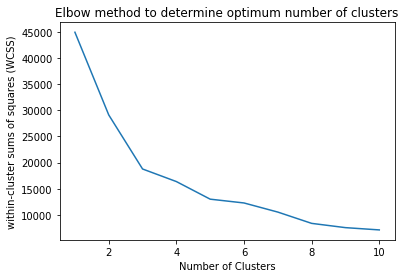

In [23]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [24]:
K=5 # number of clusters

In [25]:
kmeans=Kmeans(X,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()

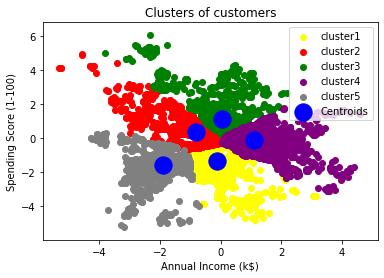

In [26]:
color=['yellow','red','green','purple','grey']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='blue',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()